In [121]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [123]:
# import necessary libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import datetime
import matplotlib.pylab as plt
import plotly.graph_objects as go
from pathlib import Path
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [124]:
from pymongo import MongoClient
import pymongo
# MongoDB Atlas connection string
# Replace '<your_connection_string>' with your actual connection string
connection_string = '<your_connection_string>'
try:
    # Connect to MongoDB Atlas
    client = MongoClient(connection_string)
# return a friendly error if a URI error is thrown 
except pymongo.errors.ConfigurationError:
    print("An Invalid URI host error was received. Is your Atlas host name correct in your connection string (found the .env)?")

#print(client.list_database_names())



['auth', 'scrape', 'admin', 'local']


In [125]:
database_name = 'scrape'
db = client[database_name]
#print(db.list_collection_names())


['scraped_raw', 'scrape_raw', 'scraped_processed']


In [126]:
collection_name = 'scraped_raw'
collection = db[collection_name]

# Fetch data from MongoDB and convert it to a DataFrame
cursor = collection.find()
data = list(cursor)
cars = pd.DataFrame(data)

# Convert DataFrame to CSV
csv_filename = 'output_data.csv'
cars.to_csv(csv_filename, index=False)

# Close the MongoDB connection
client.close()

print(f'Data has been successfully exported to {csv_filename}')



Data has been successfully exported to output_data.csv


In [ ]:
# Specify the database and collection
# Replace '<your_database>' and '<your_collection>' with your actual database and collection names
database_name = 'scrape'
collection_name = 'scraped_processsed'
db = client[database_name]
collection = db[collection_name]

# Fetch data from MongoDB and convert it to a DataFrame
cursor = collection.find()
data = list(cursor)
cars = pd.DataFrame(data)

# Convert DataFrame to CSV
csv_filename = 'output_data.csv'
cars.to_csv(csv_filename, index=False)

# Close the MongoDB connection
client.close()

print(f'Data has been successfully exported to {csv_filename}')


In [127]:
cars = pd.read_csv('output_data.csv')

In [6]:
#cars = pd.read_csv('data.csv')

In [128]:
cars.head()

,_id,source,scraper-version,scrape-date,title,price,location,odometer,link,images
0,https://abilene.craigslist.org/cto/d/clyde-201...,craigslist,1,2023-11-13,2015 GMC Terrian SLT Leather Seats SUV,"$8,495",Clyde,165k mi,https://abilene.craigslist.org/cto/d/clyde-201...,['https://images.craigslist.org/00q0q_fqrDYmbI...
1,https://abilene.craigslist.org/cto/d/abilene-2...,craigslist,1,2023-11-13,2012 Ford Edge SUV,"$5,900",Abilene,127k mi,https://abilene.craigslist.org/cto/d/abilene-2...,['https://images.craigslist.org/00u0u_djFxYThj...
2,https://abilene.craigslist.org/ctd/d/georgetow...,craigslist,1,2023-11-13,2014 FORD F-350 KING RANCH 4X4 DIESEL NAV ROOF...,"$29,999",WWW.GETADIESEL.COM,227k mi,https://abilene.craigslist.org/ctd/d/georgetow...,['https://images.craigslist.org/00z0z_fBJpyxit...
3,https://abilene.craigslist.org/ctd/d/georgetow...,craigslist,1,2023-11-13,1-OWNER 2019 CHEVY 3500HD LTZ 4X4 DURAMAX SKIR...,"$42,900",WWW.GETADIESEL.COM,143k mi,https://abilene.craigslist.org/ctd/d/georgetow...,['https://images.craigslist.org/00J0J_cBZBKQMO...
4,https://abilene.craigslist.org/ctd/d/georgetow...,craigslist,1,2023-11-13,2017 FORD F-250 KING RANCH FX4 DIESEL NAV BDS ...,"$42,897",WWW.GETADIESEL.COM,180k mi,https://abilene.craigslist.org/ctd/d/georgetow...,['https://images.craigslist.org/00v0v_3LJpHDnn...


In [129]:
cars.shape[0]

176

## Data Cleaning

In [130]:
# drop unnecessary variables: id, url, region_url, VIN, image_url, description, lat, and long
cars = cars.drop(columns = ['_id', 'link'])

In [131]:
cars.head()

,source,scraper-version,scrape-date,title,price,location,odometer,images
0,craigslist,1,2023-11-13,2015 GMC Terrian SLT Leather Seats SUV,"$8,495",Clyde,165k mi,['https://images.craigslist.org/00q0q_fqrDYmbI...
1,craigslist,1,2023-11-13,2012 Ford Edge SUV,"$5,900",Abilene,127k mi,['https://images.craigslist.org/00u0u_djFxYThj...
2,craigslist,1,2023-11-13,2014 FORD F-350 KING RANCH 4X4 DIESEL NAV ROOF...,"$29,999",WWW.GETADIESEL.COM,227k mi,['https://images.craigslist.org/00z0z_fBJpyxit...
3,craigslist,1,2023-11-13,1-OWNER 2019 CHEVY 3500HD LTZ 4X4 DURAMAX SKIR...,"$42,900",WWW.GETADIESEL.COM,143k mi,['https://images.craigslist.org/00J0J_cBZBKQMO...
4,craigslist,1,2023-11-13,2017 FORD F-250 KING RANCH FX4 DIESEL NAV BDS ...,"$42,897",WWW.GETADIESEL.COM,180k mi,['https://images.craigslist.org/00v0v_3LJpHDnn...


In [132]:
# look at the number of NA values by column
cars.isna().sum()

source             0
scraper-version    0
scrape-date        0
title              0
price              0
location           0
odometer           0
images             0
dtype: int64

In [69]:
#cars = cars.drop(columns = ['images/23','images/22','images/21','images/20','images/19','images/18','images/17','images/16','images/15','images/14','images/13','images/12','images/11','images/10','images/9','images/8', 'images/7','images/6','images/5','images/4','images/3','images/2','images/1'])

In [133]:
cars.head()

,source,scraper-version,scrape-date,title,price,location,odometer,images
0,craigslist,1,2023-11-13,2015 GMC Terrian SLT Leather Seats SUV,"$8,495",Clyde,165k mi,['https://images.craigslist.org/00q0q_fqrDYmbI...
1,craigslist,1,2023-11-13,2012 Ford Edge SUV,"$5,900",Abilene,127k mi,['https://images.craigslist.org/00u0u_djFxYThj...
2,craigslist,1,2023-11-13,2014 FORD F-350 KING RANCH 4X4 DIESEL NAV ROOF...,"$29,999",WWW.GETADIESEL.COM,227k mi,['https://images.craigslist.org/00z0z_fBJpyxit...
3,craigslist,1,2023-11-13,1-OWNER 2019 CHEVY 3500HD LTZ 4X4 DURAMAX SKIR...,"$42,900",WWW.GETADIESEL.COM,143k mi,['https://images.craigslist.org/00J0J_cBZBKQMO...
4,craigslist,1,2023-11-13,2017 FORD F-250 KING RANCH FX4 DIESEL NAV BDS ...,"$42,897",WWW.GETADIESEL.COM,180k mi,['https://images.craigslist.org/00v0v_3LJpHDnn...


In [134]:
cars.shape[0]

176

In [135]:
# drop NA values
cars = cars.dropna()

In [136]:
cars.shape[0]

176

In [137]:
cars.head()

,source,scraper-version,scrape-date,title,price,location,odometer,images
0,craigslist,1,2023-11-13,2015 GMC Terrian SLT Leather Seats SUV,"$8,495",Clyde,165k mi,['https://images.craigslist.org/00q0q_fqrDYmbI...
1,craigslist,1,2023-11-13,2012 Ford Edge SUV,"$5,900",Abilene,127k mi,['https://images.craigslist.org/00u0u_djFxYThj...
2,craigslist,1,2023-11-13,2014 FORD F-350 KING RANCH 4X4 DIESEL NAV ROOF...,"$29,999",WWW.GETADIESEL.COM,227k mi,['https://images.craigslist.org/00z0z_fBJpyxit...
3,craigslist,1,2023-11-13,1-OWNER 2019 CHEVY 3500HD LTZ 4X4 DURAMAX SKIR...,"$42,900",WWW.GETADIESEL.COM,143k mi,['https://images.craigslist.org/00J0J_cBZBKQMO...
4,craigslist,1,2023-11-13,2017 FORD F-250 KING RANCH FX4 DIESEL NAV BDS ...,"$42,897",WWW.GETADIESEL.COM,180k mi,['https://images.craigslist.org/00v0v_3LJpHDnn...


In [138]:
# convert year and odometer to integer values
#cars['odometer'] = cars['odometer'].str.replace('K', '').str.replace(' miles', '').astype(int) * 1000
#cars['odometer'] = cars['odometer'].str.replace('K miles', '').str.replace(' miles · Dealership', '').astype(float).astype(int) * 1000
import re
cars['odometer'] = cars['odometer'].apply(lambda x: int(re.search(r'\d+', str(x)).group(0)) if re.search(r'\d+', str(x)) else None)
cars['year'] = cars['title'].str.extract(r'(\d{4})')
# Fill NaN values in the 'year' column with a placeholder (you can choose a value that makes sense)
cars['year'].fillna(-1, inplace=True)
cars = cars.astype({'year':'int', 'odometer':'int'})

In [139]:
# create an age variable to get a better understanding of how old a car is
cars['age'] = datetime.date.today().year - cars['year']

In [140]:
cars.head()

,source,scraper-version,scrape-date,title,price,location,odometer,images,year,age
0,craigslist,1,2023-11-13,2015 GMC Terrian SLT Leather Seats SUV,"$8,495",Clyde,165,['https://images.craigslist.org/00q0q_fqrDYmbI...,2015,8
1,craigslist,1,2023-11-13,2012 Ford Edge SUV,"$5,900",Abilene,127,['https://images.craigslist.org/00u0u_djFxYThj...,2012,11
2,craigslist,1,2023-11-13,2014 FORD F-350 KING RANCH 4X4 DIESEL NAV ROOF...,"$29,999",WWW.GETADIESEL.COM,227,['https://images.craigslist.org/00z0z_fBJpyxit...,2014,9
3,craigslist,1,2023-11-13,1-OWNER 2019 CHEVY 3500HD LTZ 4X4 DURAMAX SKIR...,"$42,900",WWW.GETADIESEL.COM,143,['https://images.craigslist.org/00J0J_cBZBKQMO...,2019,4
4,craigslist,1,2023-11-13,2017 FORD F-250 KING RANCH FX4 DIESEL NAV BDS ...,"$42,897",WWW.GETADIESEL.COM,180,['https://images.craigslist.org/00v0v_3LJpHDnn...,2017,6


## Data Exploration

[Text(0.5, 1.0, 'Distribution of Car Ages')]

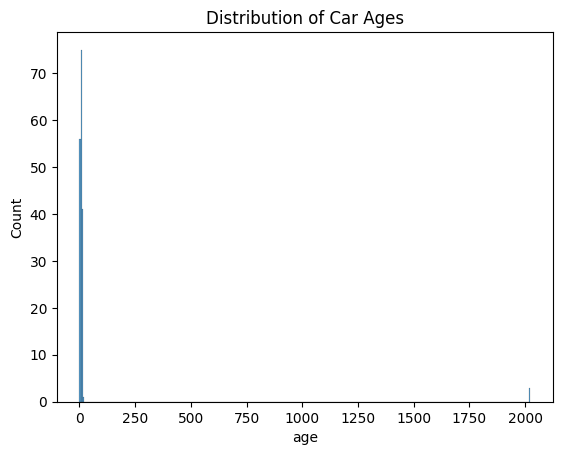

In [141]:
sns.histplot(data = cars, x = 'age', binwidth = 5).set(title = 'Distribution of Car Ages')

In [142]:
cars[cars['year'] < 1990]

,source,scraper-version,scrape-date,title,price,location,odometer,images,year,age
20,craigslist,1,2023-11-13,Hyundai n line night edition,$1,Abilene,43,['https://images.craigslist.org/00d0d_kxEDyPhc...,-1,2024
110,craigslist,1,2023-11-17,VW Beetle,"$11,000",De Leon,123,['https://images.craigslist.org/00y0y_beMk0BoY...,-1,2024
171,craigslist,1,2023-11-17,Semi truck,"$17,500",Amarillo,735,['https://images.craigslist.org/00y0y_lf5lgq6v...,-1,2024


In [143]:
cars = cars[cars.year >= 2005]

In [144]:
cars.shape[0]

173

[Text(0.5, 1.0, 'Distribution of Car Ages')]

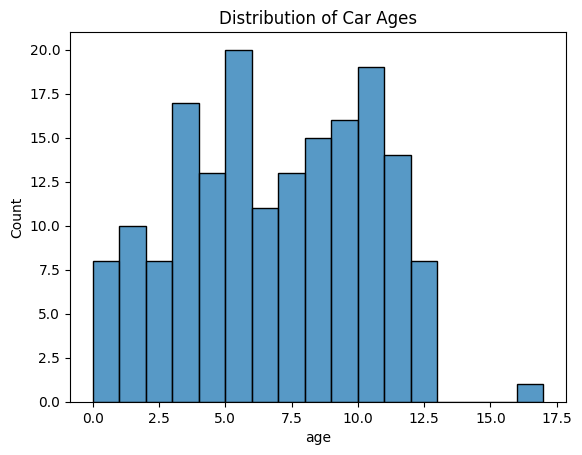

In [145]:
# looking again at the distribution of ages
sns.histplot(data = cars, x = 'age', binwidth = 1).set(title = 'Distribution of Car Ages')

In [146]:
cars.shape[0]

173

[Text(0.5, 1.0, 'Distribution of Car Odometer')]

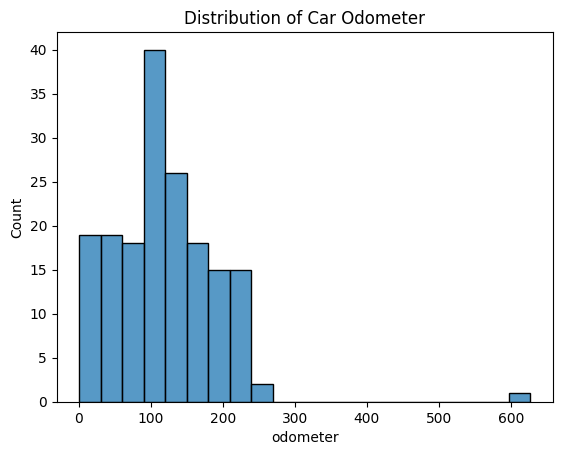

In [147]:
sns.histplot(data = cars, x = 'odometer').set(title = 'Distribution of Car Odometer')

In [148]:
cars[cars['odometer'] > 300]

,source,scraper-version,scrape-date,title,price,location,odometer,images,year,age
14,craigslist,1,2023-11-13,2015 *Peterbilt* *579* *w/sleeper*,"$42,900",Peterbilt 579 w/sleeper,627,['https://images.craigslist.org/00u0u_iI62XuOK...,2015,8


In [149]:
cars = cars[cars.odometer <= 300]
# Clean up the 'price' column by replacing non-numeric values with NaN
cars['price'] = pd.to_numeric(cars['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Fill NaN values in the 'price' column with a placeholder (you can choose a value that makes sense)
cars['price'].fillna(-1, inplace=True)

# Convert 'price' column to integers
cars['price'] = cars['price'].astype(int)


In [150]:
cars.shape[0]

172

[Text(0.5, 1.0, 'Distribution of Car Odometer')]

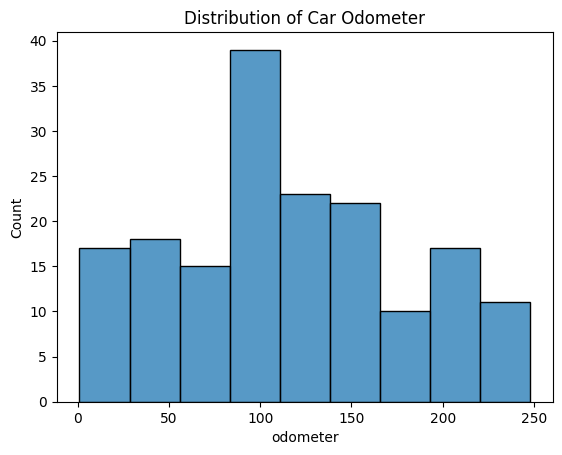

In [151]:
sns.histplot(data = cars, x = 'odometer').set(title = 'Distribution of Car Odometer')

[Text(0.5, 1.0, 'Correlation of Vehicle Odometer and List Price')]

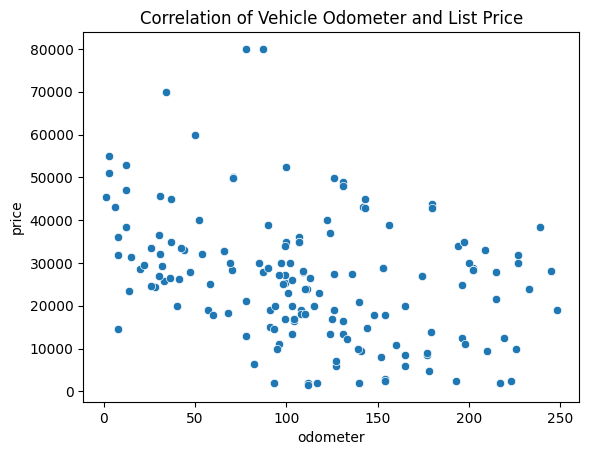

In [152]:
sns.scatterplot(data = cars, x = 'odometer', y = 'price').set(title = 'Correlation of Vehicle Odometer and List Price')

In [153]:
cars[cars['price'] > 100000]

,source,scraper-version,scrape-date,title,price,location,odometer,images,year,age


In [155]:
cars = cars[cars.price <= 100000]

In [156]:
cars.shape[0]

172

[Text(0.5, 1.0, 'Correlation of Vehicle Odometer and List Price')]

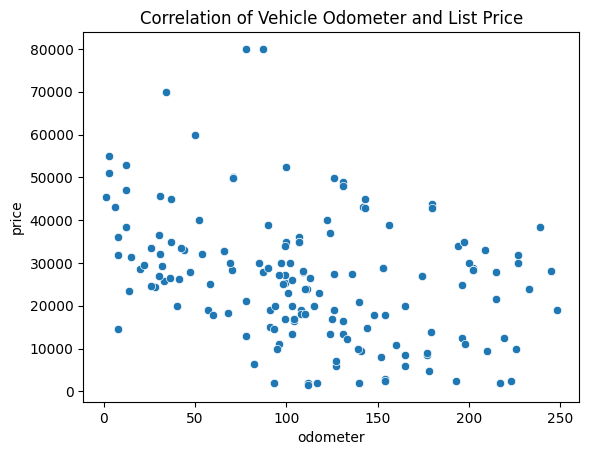

In [157]:
# look at the odometer vs price now
sns.scatterplot(data = cars, x = 'odometer', y = 'price').set(title = 'Correlation of Vehicle Odometer and List Price')

[Text(0.5, 1.0, 'Distribution of List Price')]

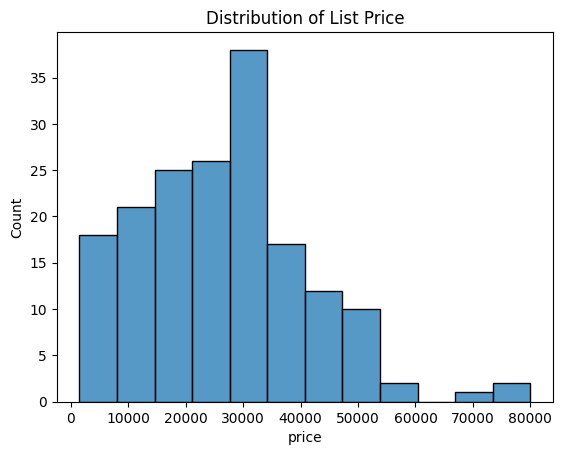

In [158]:
sns.histplot(data = cars, x = 'price').set(title = 'Distribution of List Price')

In [159]:
cars[cars['price'] < 1000]

,source,scraper-version,scrape-date,title,price,location,odometer,images,year,age


In [160]:
cars = cars[cars.price >= 1000]

[Text(0.5, 1.0, 'Distribution of List Price')]

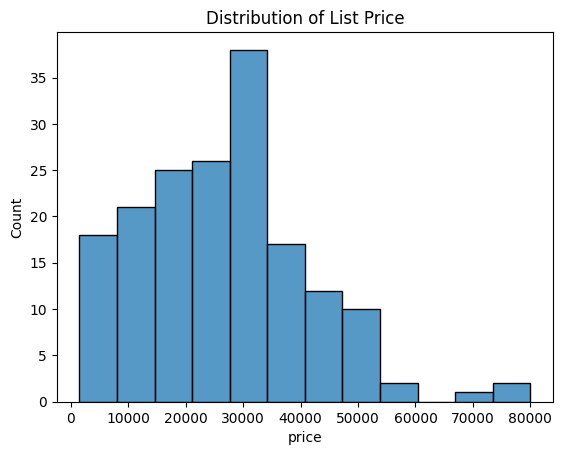

In [161]:
sns.histplot(data = cars, x = 'price').set(title = 'Distribution of List Price')

In [162]:
cars.shape[0]

172

In [174]:
#Dictionary of car makes
kbb_make = {
    'acura',
    'alfa-romeo',
    'aston-martin',
    'audi',
    'bentley',
    'bmw',
    'buick',
    'cadillac',
    'chevrolet',
    'chrysler',
    'dodge',
    'ferrari',
    'fiat',
    'ford',
    'genesis',
    'gmc',
    'honda',
    'hyundai',
    'infiniti',
    'jaguar',
    'jeep',
    'kia',
    'lamborghini',
    'land rover',
    'lexus',
    'lincoln',
    'lucid',
    'maserati',
    'mazda',
    'mclaren',
    'mercedes-benz',
    'mini',
    'mitsubishi',
    'nissan',
    'polestar',
    'porsche',
    'ram',
    'rivian',
    'rolls-royce',
    'subaru',
    'tesla',
    'toyota',
    'volkswagen',
    'volvo',
}

# Dictionary to store car models for each make
kbb_models = {
    'acura': ['ILX', 'MDX', 'NSX','RDX','TLX'],
    'alfa-romeo': ['Giulia', 'Stelvio'],
    'aston-martin': ['DB11', 'DBS', 'DBX','Vantage'],
    'audi': ['A3', 'A4','A4 allroad','A5', 'A6','A6 allroad',
             'A7','A8','e-tron','e-tron GT','e-tron S',
             'e-tron S Sportback','e-tron Sportback','Q3',
             'Q4 e-tron','Q4 Sportback e-tron','Q5', 
             'Q5 Sportback','Q7','Q8','R8','RS 3','RS 5',
             'RS 6','RS 7', 'RS e-tron GT','RS Q8','S3',
             'S4','S5','S6','S7','S8','SQ5','SQ5 Sportback',
             'SQ7','SQ8','TT'],
    'bentley': ['Bentayga','Continental GT','Flying Spur'],
    'bmw': ['2 Series','3 Series','4 Series', '5 Series',
            '6 Series','7 Series','8 Series','i4','iX','M3',
            'M4','M5','M8','X1','X2','X3','X3 M','X4','X4 M','X5',
            'X5 M','X6','X6 M','X7','Z4'],
    'buick': ['Enclave','Encore','Encore GX','Envision'],
    'cadillac': ['CT4','CT5','Escalade','Escalade ESV','XT4','XT5','XT6'],
    'chevrolet': ['Blazer','Bolt EUV','Bolt EV','Camaro','Colorado Crew Cab',
                  'Colorado Extended Cab','Corvette','Equinox','Express 2500 Cargo',
                  'Express 2500 Passenger','Express 3500 Cargo','Express 3500 Passenger',
                  'Malibu','Silverado 1500 Crew Cab','Silverado 1500 Double Cab',
                  'Silverado 1500 Regular Cab','Silverado 1500 Limited Crew Cab',
                  'Silverado 1500 Limited Double Cab','Silverado 1500 Limited Regular Cab',
                  'Silverado 2500 HD Crew Cab','Silverado 2500 HD Double Cab',
                  'Silverado 2500 HD Regular Cab','Silverado 3500 HD Crew Cab',
                  'Silverado 3500 HD Double Cab','Silverado 3500 HD Regular Cab',
                  'Spark','Suburban','Tahoe','Trailblazer','Traverse','Trax',
                  'Avalanche','Cruze','Impala','Lumina','Malibu Maxx','Monte Carlo','SS','Uplander','Venture'],
    'chrysler': ['300','Pacifica','Pacifica Hybrid','Voyager'],
    'dodge': ['Charger', 'Challenger', 'Durango'],
    'ferrari': ['296 GTB','812 Competizione','812 Competizione A','812 GTS',
                'F8', 'Portofino', 'SF90', 'Roma'],
    'fiat': ['500X'],
    'ford': ['Bronco', 'Bronco Sport','E-Transit 350 Cargo Van','EcoSport', 'Edge', 
             'Escape','Escape Plug-in Hybrid', 'Expedition','Expedition MAX', 
             'Explorer', 'F150 Lightning', 'F150 Regular Cab','F150 Super Cab',
             'F150 SuperCrew Cab', 'F250 Super Duty Crew Cab','F250 Super Duty Regular Cab',
             'F250 Super Duty Super Cab', 'F350 Super Duty Crew Cab','F350 Super Duty Regular Cab',
             'F350 Super Duty Super Cab', 'F450 Super Duty Crew Cab','F450 Super Duty Regular Cab', 
             'Maverick', 'Mustang','Mustang MACH-E', 'Ranger SuperCab','Ranger SuperCrew', 
             'Transit 150 Cargo Van', 'Transit 150 Crew Van', 'Transit 150 Passenger Van',              
             'Transit 250 Cargo Van', 'Transit 250 Crew Van', 'Transit 350 HD Cargo Van', 'Transit 350 HD Crew Van',
             'Transit 350 Cargo Van', 'Transit 350 Crew Van', 'Transit 350 Passenger Van', 
             'Transit Connect Cargo Van', 'Transit Connect Passenger Wagon','C-Max Hybrid','C-Max Energi',
             'Fiesta','Flex','Focus','Fusion','Mustang Mach-E','Taurus','Thunderbird'],
    'genesis': ['G70', 'G80','G90', 'GV70','GV80'],
    'gmc': ['Acadia','Canyon Crew Cab','Canyon Extended Cab','HUMMER EV Pickup','Savana 2500 Cargo','Savana 2500 Passenger', 
            'Savana 3500 Cargo','Savana 3500 Passenger','Sierra 1500 Crew Cab', 'Sierra 1500 Double Cab','Sierra 1500 Regular Cab',
            'Sierra 1500 Limited Crew Cab', 'Sierra 1500 Limited Double Cab', 'Sierra 1500 Limited Regular Cab', 
            'Sierra 2500 HD Crew Cab','Sierra 2500 HD Double Cab','Sierra 2500 HD Regular Cab', 'Sierra 3500 HD Crew Cab',
            'Sierra 3500 HD Double Cab','Sierra 3500 HD Regular Cab', 'Yukon', 'Yukon XL', 'Terrain','C1500 Pickup','C2500 Pickup',
            'C3500 Pickup','Envoy','Envoy XL','Envoy XUV','Jimmy','R/V 3500 Series','S15 Jimmy','Safari','Savana 1500 Cargo',
            'Savana 1500 Passenger','Savana 2500 Cargo','Savana 2500 Passenger','Savana 3500 Cargo',
            'Savana 3500 Passenger','Sierra 1500 Classic Crew Cab','Sierra 1500 Classic Double Cab',
            'Sierra 1500 Classic Regular Cab','Sierra 1500 HD Classic Crew Cab','Sierra 1500 HD Classic Double Cab',
            'Sierra 1500 HD Classic Regular Cab','Sierra 2500 Classic Crew Cab','Sierra 2500 Classic Double Cab',
            'Sierra 2500 Classic Regular Cab','Sierra 3500 Classic Crew Cab','Sierra 3500 Classic Double Cab',
            'Sierra 3500 Classic Regular Cab','Sonoma','Suburban 1500','Suburban 2500','Syclone','Typhoon',
            'Vandura 1500','Vandura 2500','Vandura 3500','Yukon XL 1500','Yukon XL 2500'],
    'honda': ['Accord', 'Accord Hybrid', 'Civic', 'CR-V', 'CR-V Hybrid', 'HR-V', 'Insight', 'Odyssey', 'Passport', 'Pilot',
              'Fit','Element','Prelude','S2000','Crosstour','Ridgeline'],
    'hyundai': ['Accent', 'Elantra', 'Elantra N' , 'IONIQ5', 'Ioniq Hybrid','Ioniq Plug-in Hybrid','Kona', 'Kona Electric', 'Kona N',
                'Palisade', 'Santa Fe', 'Santa Fe Hybrid', 'Santa Fe Plug-in Hybrid','Sonata', 'Sonata Hybrid', 'Tucson', 'Tucson Hybrid', 
                'Tucson Plug-in Hybrid', 'Venue', 'Veloster', 'Santa Cruz','Azera','Equus','Genesis Coupe','Genesis G70','Genesis G80',
                'Genesis G90','Santa Fe Sport','Santa Fe XL','Veracruz'],
    'infiniti': ['Q50', 'Q60','QX50','QX55','QX60','QX80','EX35','EX37','FX35','FX37','FX45','FX50',
                'G25','G35','G37','I30','I35','JX35',
                'M35','M35h','M37','M45','M56','Q40',
                'Q45','QX4','QX56','QX60 Hybrid',
                'QX70',],
    'jaguar': ['XF', 'E-PACE','F-PACE','F-TYPE', 'I-PACE','S-Type','X-Type','XE','XE SV Project 8','XJ','XJR',
                'XJR-S','XJS','XK','XK-Series'],
    'jeep': ['Cherokee', 'Compass', 'Gladiator', 'Grand Cherokee', 'Grand Cherokee 4xe', 'Grand Cherokee L', 'Grand Wagoneer','Renegade', 
             'Wagoneer','Wrangler','Wrangler Unlimited', 'Wrangler Unlimited 4xe','CJ-5','CJ-7','CJ-8 Scrambler','Commander','Comanche','Dispatcher',
            'FC-150','FC-170','FC-170 DRW','Gladiator (JT)','Grand Cherokee SRT',
            'Grand Cherokee SRT8','Grand Cherokee Trackhawk','Grand Wagoneer (SJ)',
            'J-100','J-2500','J-2600','J-2700','J-2800','J-3500','J-3600',
            'J-3700','J-3800','J10','J20','Jeepster','Jeepster Commando','Liberty',
            'Patriot','Scrambler','Wagoneer (SJ)','Wagoneer (XJ)','Willys','Wrangler (JK)',
            'Wrangler (LJ)','Wrangler (TJ)','Wrangler (YJ)'],
    'kia': ['Cadenza', 'Forte', 'K5', 'K900', 'Niro', 'Rio', 'Seltos', 'Sorento', 'Soul', 'Sportage', 'Stinger', 
            'Telluride','Amanti','Borrego','Forte5','K900','Optima','Optima Hybrid','Rondo','Sedona',
            'Sephia','Sorento Sport','Soul EV','Spectra','Sportage Hybrid','Telluride Nightfall Edition'],
    'lamborghini': ['Aventador', 'Huracan', 'Urus','Gallardo','Centenario','Diablo','Gallardo Spyder','Huracan Evo','Huracan Evo Spyder',
            'Huracan Performante','Huracan Performante Spyder','Huracan Spyder',
            'Murcielago','Murcielago Roadster','Reventon','Urus Graphite Capsule'],
    'land rover': ['LR2','LR4','Defender', 'Discovery', 'Discovery Sport', 'Range Rover', 'Range Rover Evoque', 'Range Rover Sport', 'Range Rover Velar',
                   'Discovery Series II','Discovery Series II SD','Discovery Sport SD',
                    'Discovery Series II SE7','Discovery Series II XD','Freelander',
                    'Freelander SE','Freelander SE3','LR2 HSE','LR3','LR3 HSE','LR3 SE',
                    'LR4 HSE','LR4 HSE LUX','LR4 V8','LR4 V8 HSE LUX','Range Rover 4.0 SE',
                    'Range Rover 4.6 HSE','Range Rover HSE','Range Rover Velar R-Dynamic',
                    'Range Rover Velar S','Range Rover Velar SE','Range Rover Velar SVAutobiography Dynamic',
                    'Range Rover Westminster','Range Rover Westminster Edition','Range Rover 4.6 HSE',
                    'Range Rover Autobiography','Range Rover Autobiography Black','Range Rover Autobiography Black LWB',
                    'Range Rover Autobiography L','Range Rover Autobiography LWB',
                    'Range Rover HSE','Range Rover HSE LUX','Range Rover Long Wheelbase','Range Rover SE',
                    'Range Rover Sport','Range Rover Sport 5.0L V8 Supercharged','Range Rover Sport GT Limited Edition',
                    'Range Rover Sport HSE','Range Rover Sport HST','Range Rover Sport Limited Edition','Range Rover Sport SC',
                    'Range Rover Sport SE','Range Rover Sport Supercharged','Range Rover Sport SVR',
                    'Range Rover Velar','Range Rover Velar First Edition','Range Rover Velar P250 S','Range Rover Velar P250 SE',
                    'Range Rover Velar P250 R-Dynamic S','Range Rover Velar P250 R-Dynamic SE','Range Rover Velar P250 R-Dynamic HSE',
                    'Range Rover Velar P340 S','Range Rover Velar P340 SE','Range Rover Velar P340 R-Dynamic S',
                    'Range Rover Velar P340 R-Dynamic SE','Range Rover Velar P380 R-Dynamic HSE','Range Rover 4.0 SE',
                    'Range Rover Autobiography','Range Rover Autobiography Black',
                    'Range Rover Autobiography Black LWB','Range Rover Autobiography L',
                    'Range Rover Autobiography LWB','Range Rover HSE','Range Rover HSE LUX',
                    'Range Rover Long Wheelbase','Range Rover SE'],
    'lexus': ['ES', 'GS', 'GX', 'IS', 'LS', 'LX', 'NX', 'RC', 'RX', 'UX','CT','ES 250','ES 300','ES 300h','ES 330','ES 350','GS 200t','GS 300',
            'GS 350','GS 400','GS 430','GS 450h','GS 460','GS F','GX 460','GX 470','HS 250h','IS 200t','IS 250',
        'IS 300','IS 350','IS 350C','LC 500','LC 500h','LFA','LS 400',
        'LS 430','LS 460','LS 500','LS 500h','LS 600h','LX 450','LX 470',
        'LX 570','NX 200t','NX 300','NX 300h','RC 200t','RC 300','RC 350',
        'RC F','RX 300','RX 330','RX 350','RX 350L','RX 400h','RX 450h',
        'RX 450hL','SC 300','SC 400','SC 430','UX 200','UX 250h',
        'GS 300','GS 350','GS 450h','GS F','IS 200t','IS 300',
        'LC 500','LC 500h','LS 500','LS 500h','LX 570','NX 200t',
        'NX 300','RC 300','RC 350','RC F','RX 350','RX 450h',
        'ES 250','ES 300','ES 300h','ES 330','ES 350','GS 200t',
        'GS 300','GS 350','GS 400','GS 430','GS 450h','GS F','GX 460',
        'GX 470','HS 250h','IS 200t','IS 250','IS 300','IS 350',
        'IS 350C','LC 500','LC 500h','LFA','LS 400','LS 430',
        'LS 460','LS 500','LS 500h','LS 600h','LX 450','LX 470',
        'LX 570','NX 200t','NX 300','NX 300h','RC 200t','RC 300',
        'RC 350','RC F','RX 300','RX 330','RX 350','RX 350L',
        'RX 400h','RX 450h','RX 450hL','SC 300','SC 400','SC 430',
        'UX 200','UX 250h'],
    'lincoln': ['Aviator', 'Continental', 'Corsair', 'MKS','MKZ','MKT','MKX', 'Nautilus', 'Navigator', 'Navigator L','Blackwood','Capri','Continental Mark III','Continental Mark IV',
                'Continental Mark V','Continental Mark VI','Corsair','LS','Mark LT',
                'Mark VI','Mark VII','Mark VIII','MKS','MKT','MKX','MKZ',
                'Nautilus','Navigator','Navigator L','Town Car','Versailles',
                'Zephyr'],
    'lucid': ['Air','Air Dream Edition','Air Grand Touring','Air Pure','Air Touring'],
    'maserati': ['Ghibli', 'GranTurismo','Levante','MC20', 'Quattroporte','430','GranSport','GranTurismo MC','Levante GTS','Levante S',
                'Quattroporte GTS','Quattroporte S','Quattroporte Trofeo'],
    'mazda': ['CX-30', 'CX-5', 'CX-9', 'Mazda3', 'Mazda6', 'MX-5 Miata','323','626','929','B-Series Pickup','CX-3','CX-7','CX-9',
                'GLC','Mazda2','Mazda3 Sport','Mazda5','Mazda6 Sport',
                'MAZDASPEED MX-5','MAZDASPEED Protege','MAZDASPEED3',
                'MAZDASPEED6','Millenia','MPV','MX-3','MX-5 Miata RF','MX-6',
                'Navajo','Protege','Protege5','RX-7','RX-8','Tribute'],
                'mclaren': ['570S', '600LT', '720S', '765LT','GT',
                '570S Spider','600LT Spider','620R','675LT','675LT Spider',
                '720S Spider','765LT Spider','GT','GT Coupe','GT Spider',
                'MP4-12C','MP4-12C Spider','P1'],
    'mclaren': ['570S', '600LT', '720S', '765LT','GT'],
    'mercedes-benz': ['A-Class', 'C-Class', 'E-Class', 'G-Class', 'GLA', 'GLC', 'GLE', 'GLS', 'S-Class','190-Class','260-Class','300-Class','350-Class','380-Class','400-Class','420-Class',
                '450-Class','500-Class','560-Class','600-Class','AMG GT','B-Class','C-Class Coupe',
                'C-Class Wagon','CL-Class','CLA','CLA-Class','CLK-Class','CLS','CLS-Class',
                'E-Class Coupe','E-Class Wagon','G-Class','GL-Class','GLA-Class','GLB','GLB-Class',
                'GLC Coupe','GLC-Class','GLE Coupe','GLE-Class','GLK-Class','GLS-Class',
                'M-Class','Maybach S-Class','Metris','R-Class','S-Class Coupe',
                'S-Class Maybach','SL-Class','SLC-Class','SLK-Class','SLR McLaren','SLS AMG',
                'Sprinter'],
    'mini': ['Clubman', 'Convertible', 'Countryman', 'Hardtop','Cooper','Cooper Clubman','Cooper Countryman','Cooper Paceman',
        'Hardtop 2 Door','Hardtop 4 Door','John Cooper Works',
        'John Cooper Works Clubman','John Cooper Works Convertible',
        'John Cooper Works Countryman','John Cooper Works Hardtop',
        'John Cooper Works Hardtop 2 Door','John Cooper Works Hardtop 4 Door',
        'John Cooper Works Paceman'],
    'mitsubishi': ['Outlander', 'Eclipse Cross', 'Pajero','3000GT','Diamante','Eclipse','Eclipse Spyder','Endeavor','Expo',
                'Galant','Lancer','Mighty Max','Mirage','Montero','Montero Sport',
                'Outlander PHEV','Outlander Sport','Raider','Sigma','Van'],
    'nissan': ['370Z', 'Altima', 'Armada', 'Frontier', 'Kicks', 'LEAF', 'Maxima', 'Murano', 'NV Cargo', 'NV Passenger', 'NV200', 'Pathfinder', 'Rogue', 'Rogue Sport', 'Titan', 'Versa',
               '200SX','240SX','300ZX','350Z','370Z Coupe','370Z NISMO','370Z Roadster',
                'Altima Hybrid','Armada','Cube','Frontier King Cab','Frontier Crew Cab',
                'GT-R','Kicks','LEAF','Maxima','Murano','Murano CrossCabriolet','NV Cargo','NV Passenger','NV200',
                'Pathfinder','Quest','Rogue','Rogue Select','Rogue Sport',
                'Sentra','Titan King Cab','Titan Crew Cab','Titan XD',
                'Versa','Versa Note','Versa Sedan','Xterra','Altima','Armada',
                'Cube','Frontier','GT-R','JUKE','Kicks','LEAF','Maxima',
                'Murano','Murano CrossCabriolet','NV Cargo','NV Passenger',
                'NV200','Pathfinder','Quest','Rogue','Rogue Select','Rogue Sport',
                'Sentra','Titan'],
    'polestar': ['2', '1', '3'],
    'porsche': ['911', 'Cayenne', 'Macan', 'Panamera', 'Taycan','718 Cayman','911 Carrera','911 Carrera 4','911 Carrera 4 Cabriolet',
                '911 Carrera 4 GTS','911 Carrera 4S','911 Carrera 4S Cabriolet',
                '911 Carrera Cabriolet','911 Carrera GTS','911 Carrera S',
                '911 Carrera S Cabriolet','911 Targa','911 Targa 4',
                '911 Targa 4 GTS','911 Targa 4S','911 Turbo','911 Turbo Cabriolet',
                '911 Turbo S','911 Turbo S Cabriolet','918 Spyder','Boxster',
                'Carrera GT','Cayenne','Cayenne Coupe','Cayenne E-Hybrid','Cayenne GTS',
                'Cayenne S','Cayenne S E-Hybrid','Cayenne Turbo','Cayenne Turbo S E-Hybrid',
                'Cayman','Macan','Panamera','Panamera 4','Panamera 4 E-Hybrid',
                'Panamera 4 Executive','Panamera 4S','Panamera 4S E-Hybrid',
                'Panamera Executive','Panamera GTS','Panamera S','Panamera Turbo',
                'Panamera Turbo Executive','Panamera Turbo S E-Hybrid'],
    'ram': ['1500', '2500', '3500','1500 Classic','1500 Classic Crew Cab','1500 Classic Quad Cab',
        '1500 Classic Regular Cab','2500','3500','3500 Chassis Cab',
        '4500 Chassis Cab','5500 Chassis Cab','C/V','Dakota',
        'ProMaster Cargo Van','ProMaster Chassis Cab','ProMaster City Cargo',
        'ProMaster City Wagon','ProMaster Cutaway','ProMaster Window Van'],
    'rivian': ['R1T', 'R1S'],
    'rolls-royce': ['Cullinan', 'Dawn', 'Ghost', 'Phantom', 'Wraith','Cullinan Black Badge','Dawn','Dawn Black Badge','Ghost',
                'Ghost Black Badge','Phantom','Phantom Drophead Coupe',
                'Phantom Drophead Coupe Waterspeed Collection','Phantom Coupe',
                'Phantom Coupe Aviator Collection','Phantom Coupe Waterspeed Collection',
                'Phantom Coupe Tiger Edition','Wraith','Wraith Black Badge'],
    'subaru': ['Ascent', 'BRZ', 'Crosstrek', 'Forester', 'Impreza', 'Legacy', 'Outback', 'WRX',
               'Ascent','Baja','BRAT','BRZ','Crosstrek','Crosstrek Hybrid',
                'Forester','Impreza','Impreza Outback Sport','Impreza WRX',
                'Legacy','Outback','SVX','Tribeca','WRX','XT','XT6'],
    'tesla': ['Model 3', 'Model S', 'Model X', 'Model Y'],
    'toyota': ['4Runner', 'Avalon', 'C-HR', 'Camry', 'Corolla', 'Highlander', 'Land Cruiser', 'Prius', 'RAV4', 
               'Sequoia', 'Sienna', 'Tacoma', 'Tundra', 'Venza', 'Yaris', 'Corolla Hatchback',
                'Corolla Hybrid','Corolla iM','FJ Cruiser','GR86','Highlander',
                'Highlander Hybrid','Land Cruiser','Matrix','Mirai','MR2',
                'MR2 Spyder','Paseo','Previa','Prius','Prius c','Prius Plug-in',
                'Prius Prime','Prius Prime Advanced','Prius Prime Premium',
                'Prius v','RAV4','RAV4 Prime','Sequoia','Sienna',
                'Supra','T100','Tacoma','Tercel','Tundra','Venza',
                'Yaris','Yaris iA','4Runner','Avalon','Avalon Hybrid',
                'C-HR','Camry','Camry Hybrid','Camry Solara','Celica',
                'Corolla','Corolla Hatchback','Corolla Hybrid','Corolla iM',
                'FJ Cruiser','GR86','Highlander','Highlander Hybrid',
                'Land Cruiser','Matrix','Mirai','MR2','MR2 Spyder',
                'Paseo','Previa','Prius','Prius c','Prius Plug-in',
                'Prius Prime','Prius Prime Advanced','Prius Prime Premium',
                'Prius v','RAV4','RAV4 Prime','Sequoia','Sienna',
                'Supra','T100','Tacoma','Tercel','Tundra','Venza',
                'Yaris','Yaris iA'],
    'volkswagen': ['Arteon', 'Atlas', 'Golf', 'Jetta', 'Passat', 'Tiguan',
                   'Atlas','Atlas Cross Sport','Beetle','Cabrio',
                'CC','e-Golf','EuroVan','Fox','GLI','Golf','Golf Alltrack',
                'Golf GTI','Golf R','Golf SportWagen','ID.4','Jetta','Jetta GLI',
                'Karmann Ghia','Microbus','Passat','Quantum','R32','Rabbit',
                'Routan','Tiguan','Touareg','Touareg 2'],
    'volvo': ['S60', 'S90', 'V60', 'V90', 'XC40', 'XC60', 'XC90','240','740','760','780','850','940','960','C30',
                'C40 Recharge','C70','S40','S60 Cross Country','S60 Recharge',
                'S70','S80','S90 Recharge','V40','V50','V60','V60 Cross Country',
                'V60 Recharge','V70','V90','V90 Cross Country','V90 Recharge',
                'XC40','XC40 Recharge','XC60','XC60 Recharge','XC70',
                'XC90','XC90 Recharge'],
}

    manufacturer                    model
0            gmc                  Terrain
1           ford                     Edge
2           ford                     F350
3      chevrolet                   3500HD
4           ford                     F250
..           ...                      ...
170         ford                     F250
172       toyota                    Prius
173    chevrolet  Silverado 1500 Crew Cab
174         ford                     F350
175         ford                     F350

[169 rows x 2 columns]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'ford'),
  Text(2, 0, 'chevrolet'),
  Text(3, 0, 'ram'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'jeep'),
  Text(6, 0, 'nissan'),
  Text(7, 0, 'kia'),
  Text(8, 0, 'cadillac'),
  Text(9, 0, 'dodge'),
  Text(10, 0, 'acura'),
  Text(11, 0, 'volkswagen'),
  Text(12, 0, 'subaru'),
  Text(13, 0, 'honda'),
  Text(14, 0, 'land rover'),
  Text(15, 0, 'hyundai'),
  Text(16, 0, 'buick'),
  Text(17, 0, 'toyota'),
  Text(18, 0, 'infiniti'),
  Text(19, 0, 'lexus')])

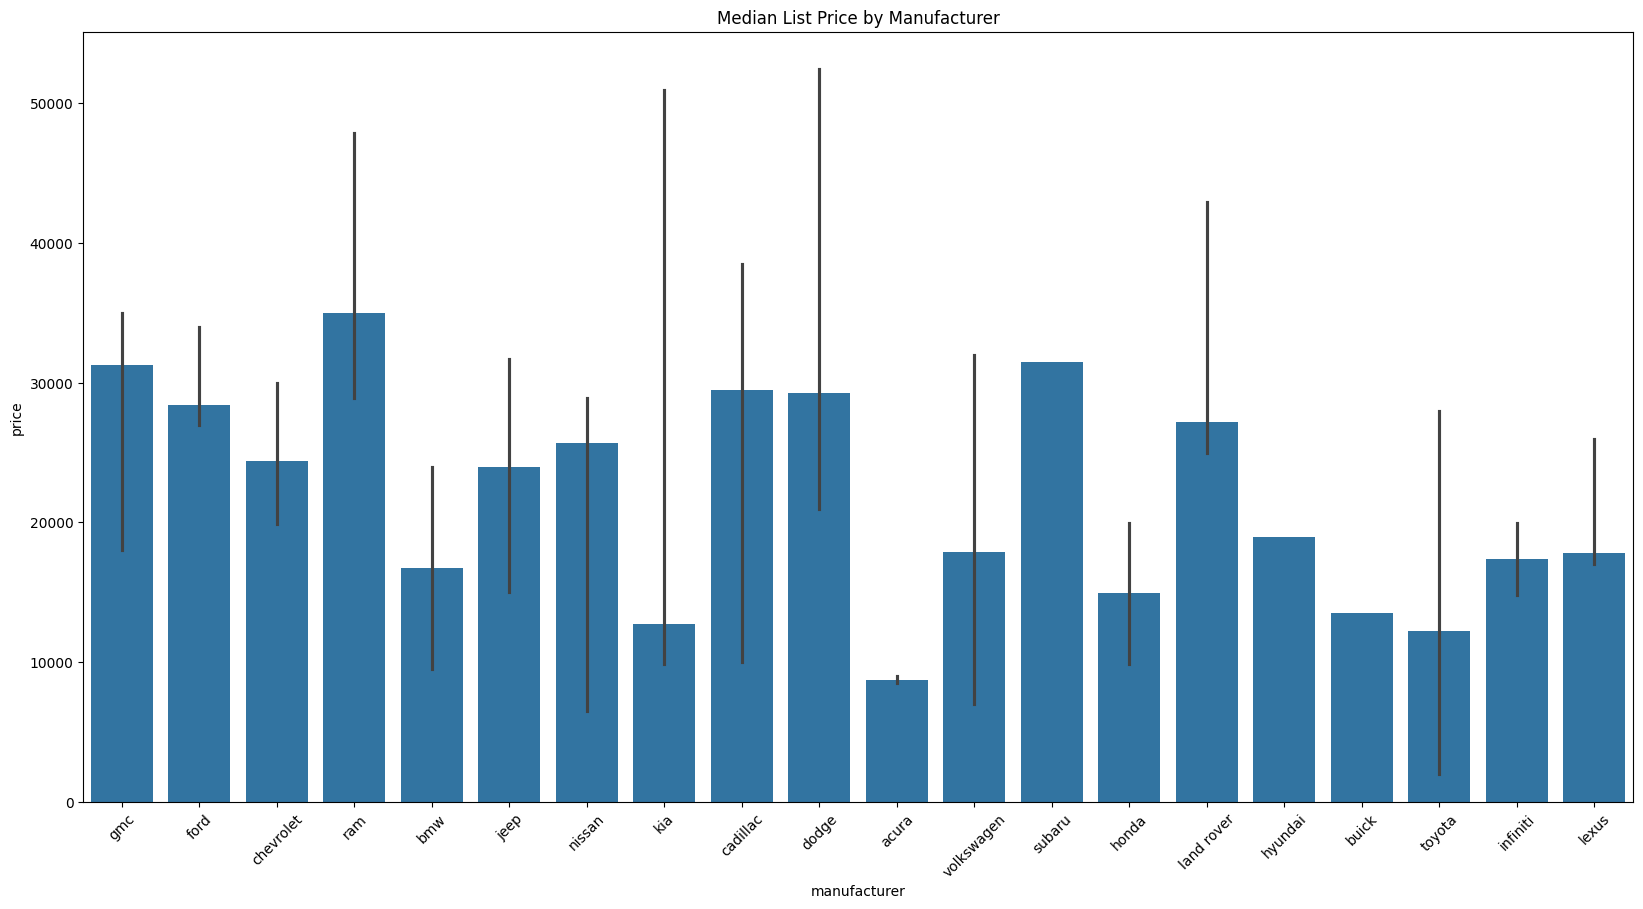

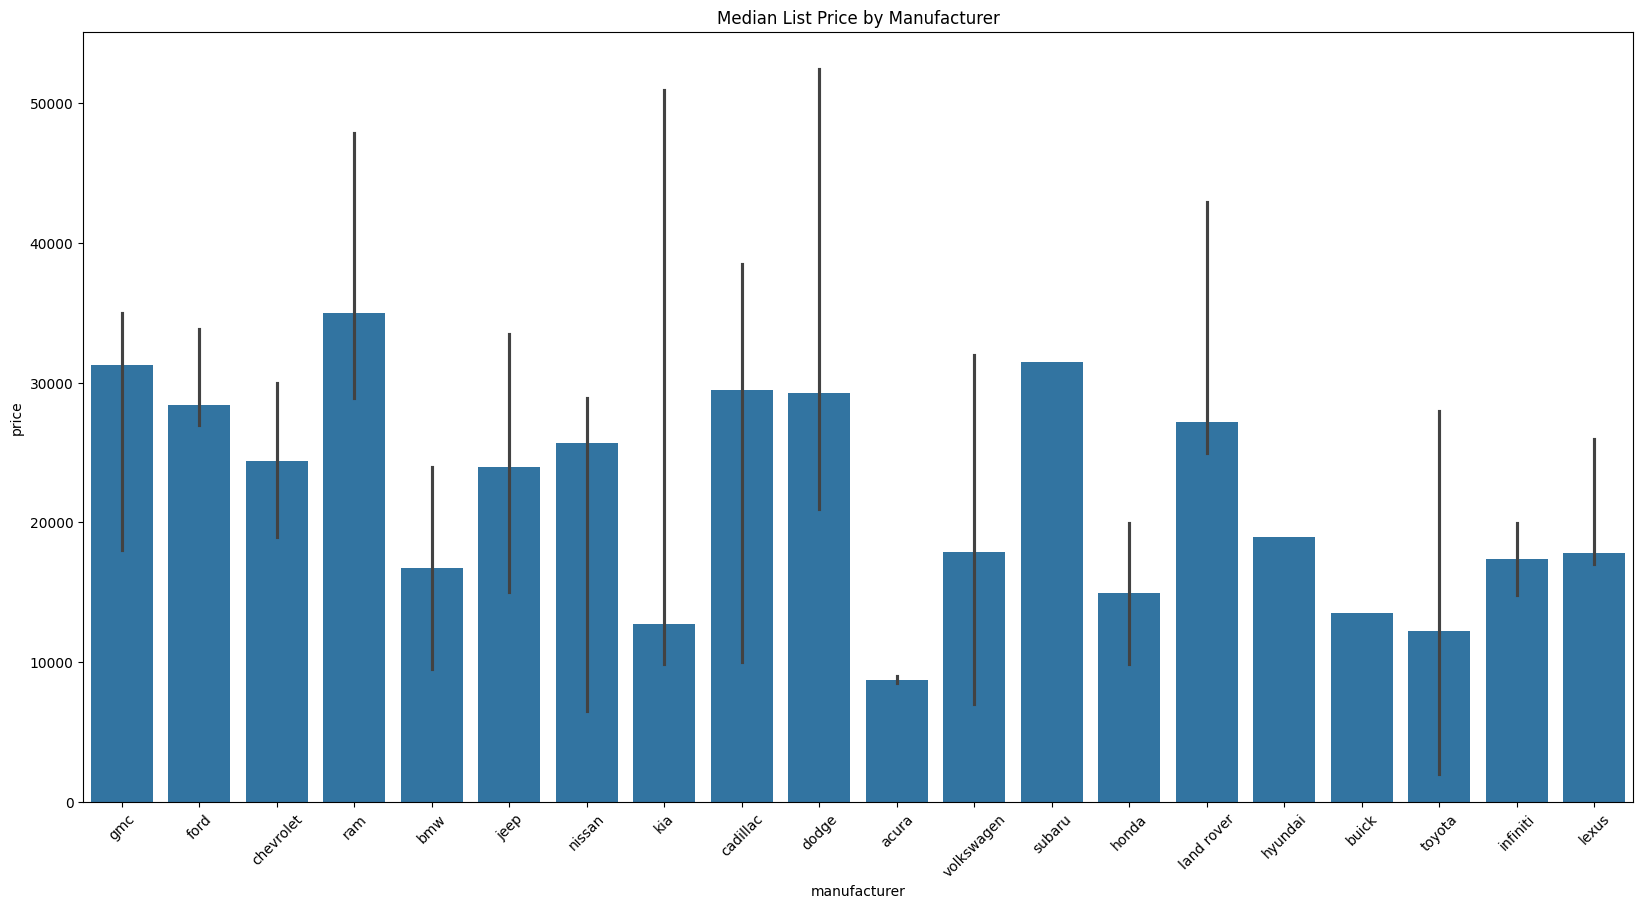

In [199]:

from difflib import get_close_matches

title = cars['title']

# Function to extract make from title
def extract_make(title):
    title_lower = title.lower()
    for make in kbb_make:
        if make in title_lower:
            return make
        elif (len(make) >= 4 and make[:4] in title_lower):
            return make
    return None

def extract_model_wreg(title, make):
    title_lower = title.lower()

    # Check if the make is in the kbb_models dictionary
    make_models = kbb_models.get(make, [])

    # Use regex to find patterns like "2021 RAM 3500" in the title
    match = re.search(r'\b\d{4}\s*[a-zA-Z0-9-]+\s*([a-zA-Z0-9-]+)\b', title)

    if match:
        # Extracted model is in the first capturing group
        model = match.group(1)

        if model is not None:
            # Handle models with dashes
            model = model.replace("-", "")

            # Compare with the kbb_models dictionary
            matched_model = get_close_matches(model, make_models, n=1)

            if matched_model:
                return matched_model[0]
            else:
                # If no direct match, try finding a close match using pieces of words
                title_words = re.findall(r'\b\w+\b', title)
                extracted_model_pieces = []

                for word in title_words:
                    # Check if the word is part of the make name, if yes, skip it
                    if make is not None and word.lower() in make.lower():
                        continue

                    extracted_model_pieces.append(word)
                    current_model_attempt = ' '.join(extracted_model_pieces)

                    # Check if the current attempt is a close match
                    matched_model = get_close_matches(current_model_attempt, make_models, n=1)
                    if matched_model:
                        return matched_model[0]

                # If still no match, return the original extracted model
                return model
        else:
            return None
    else:
        return None

# Apply the extraction functions
cars['manufacturer'] = cars['title'].apply(extract_make)
cars['model'] = cars.apply(lambda row: extract_model_wreg(row['title'], row['manufacturer']), axis=1)

# Print the DataFrame with 'manufacturer' and 'model'
result_df = cars[['manufacturer', 'model']]
print(result_df)

# Save the selected columns to CSV
result_df.to_csv('output.csv', index=False)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=cars, x='manufacturer', y='price', estimator=np.median, ax=ax).set(title='Median List Price by Manufacturer')
plt.xticks(rotation=45)


In [187]:
cars.groupby(['manufacturer'])['price'].median().sort_values(ascending = False)

manufacturer
ram           34990.0
subaru        31495.0
gmc           31240.5
cadillac      29490.0
dodge         29286.0
ford          28440.0
land rover    27224.0
nissan        25683.0
chevrolet     24429.0
jeep          23995.5
hyundai       18995.0
volkswagen    17895.0
lexus         17805.0
infiniti      17392.5
bmw           16745.0
honda         14945.0
buick         13500.0
kia           12747.5
toyota        12248.0
acura          8750.0
Name: price, dtype: float64

In [188]:
cars['manufacturer'].value_counts()

manufacturer
ford          49
chevrolet     35
ram           17
nissan        11
gmc            8
jeep           8
toyota         7
cadillac       5
dodge          5
kia            4
land rover     3
lexus          3
volkswagen     3
honda          2
bmw            2
infiniti       2
acura          2
subaru         1
hyundai        1
buick          1
Name: count, dtype: int64

In [189]:
cars.shape[0]

169

In [190]:
# Drop rows where either 'manufacturer' or 'model' is empty
cars.dropna(subset=['manufacturer', 'model'], inplace=True)

# Print the DataFrame with 'manufacturer' and 'model'
result_df = cars[['manufacturer', 'model']]
print(result_df)

# Save the selected columns to CSV
#result_df.to_csv('outputff.csv', index=False)


    manufacturer                    model
0            gmc                  Terrain
1           ford                     Edge
2           ford                     F350
3      chevrolet                   3500HD
4           ford                     F250
..           ...                      ...
170         ford                     F250
172       toyota                    Prius
173    chevrolet  Silverado 1500 Crew Cab
174         ford                     F350
175         ford                     F350

[169 rows x 2 columns]


In [191]:
cars.shape[0]

169

In [192]:
numeric_columns = ['price', 'year', 'odometer','age']
#cars.groupby(['title_status'])[numeric_columns].median()

## Modeling

### Segmentation

In [193]:
cars.head()

,source,scraper-version,scrape-date,title,price,location,odometer,images,year,age,manufacturer,model_with_dict,model_without_dict,model_wreg,model
0,craigslist,1,2023-11-13,2015 GMC Terrian SLT Leather Seats SUV,8495,Clyde,165,['https://images.craigslist.org/00q0q_fqrDYmbI...,2015,8,gmc,Acadia,None,Terrain,Terrain
1,craigslist,1,2023-11-13,2012 Ford Edge SUV,5900,Abilene,127,['https://images.craigslist.org/00u0u_djFxYThj...,2012,11,ford,Edge,None,Edge,Edge
2,craigslist,1,2023-11-13,2014 FORD F-350 KING RANCH 4X4 DIESEL NAV ROOF...,29999,WWW.GETADIESEL.COM,227,['https://images.craigslist.org/00z0z_fBJpyxit...,2014,9,ford,Bronco,F350,F350,F350
3,craigslist,1,2023-11-13,1-OWNER 2019 CHEVY 3500HD LTZ 4X4 DURAMAX SKIR...,42900,WWW.GETADIESEL.COM,143,['https://images.craigslist.org/00J0J_cBZBKQMO...,2019,4,chevrolet,Blazer,OWNER 2019,3500HD,3500HD
4,craigslist,1,2023-11-13,2017 FORD F-250 KING RANCH FX4 DIESEL NAV BDS ...,42897,WWW.GETADIESEL.COM,180,['https://images.craigslist.org/00v0v_3LJpHDnn...,2017,6,ford,Bronco,F250,F250,F250


In [206]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import numpy as np
from difflib import get_close_matches
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scrape current market price from Kelly Blue Book
def get_kbb_price(row):
    base_url = 'https://www.kbb.com/'
    
    # Check if vehicle_make and vehicle_model are not None or float
    if isinstance(row['manufacturer'], str) and isinstance(row['model'], str):
        # Replace spaces with dashes in the manufacturer and model for the URL
        make_url_part = row["manufacturer"].lower().replace(" ", "-")
        model_url_part = row["model"].lower().replace(" ", "-")
        
        search_url = f'{base_url}{make_url_part}/{model_url_part}/{row["year"]}/'
        #print(search_url)
        try:
            response = requests.get(search_url)
            soup = BeautifulSoup(response.text, 'html.parser')
            # Extract relevant information (adjust based on the actual HTML structure)
            # Extract the price information from the HTML code
            #price_field = soup.find('div', {'class': 'nationalBaseDefaultPrice'})
            #kbb_price = price_field['content'] if price_field else None

            # Use regular expression to extract the price information
            pattern = re.compile(r'"nationalBaseDefaultPrice":(\d+),')
            match = pattern.search(response.text)
            
            kbb_price = match.group(1) if match else None

            return kbb_price

            #return kbb_price.text.strip() if kbb_price else None
        except Exception as e:
            print(f"Error: {e}")
            return None
    else:
        return None


# Use ThreadPoolExecutor to parallelize the scraping process
with ThreadPoolExecutor(max_workers=5) as executor:
    kbb_prices = list(executor.map(get_kbb_price, cars.to_dict(orient='records')))

# Add the kbb_prices to the DataFrame
cars['kbb_price'] = kbb_prices

# Drop rows where kbb_price is empty
cars = cars.dropna(subset=['kbb_price'])

# Compare the actual market price with the dataset using absolute difference
cars['price_difference'] = np.abs(cars['price'] - cars['kbb_price'].astype(float))

# Print the results
#print(cars[['manufacturer', 'model', 'year', 'price', 'kbb_price', 'price_difference']])

# Flag rows with price difference greater than 10000 as fraudulent
cars['fraudulent'] = np.where(cars['price_difference'] > 10000, True, False)




    manufacturer                    model  year  price kbb_price  \
0            gmc                  Terrain  2015   8495      8092   
1           ford                     Edge  2012   5900      7199   
2           ford                     F350  2014  29999     16934   
4           ford                     F250  2017  42897     21218   
6           ford                     F250  2014  39995     14463   
..           ...                      ...   ...    ...       ...   
170         ford                     F250  2017  38500     21218   
172       toyota                    Prius  2013  12248     10574   
173    chevrolet  Silverado 1500 Crew Cab  2019  32792     24966   
174         ford                     F350  2020  49781     45503   
175         ford                     F350  2020  49781     45503   

     price_difference  fraudulent  
0               403.0       False  
1              1299.0       False  
2             13065.0        True  
4             21679.0        True  
6  

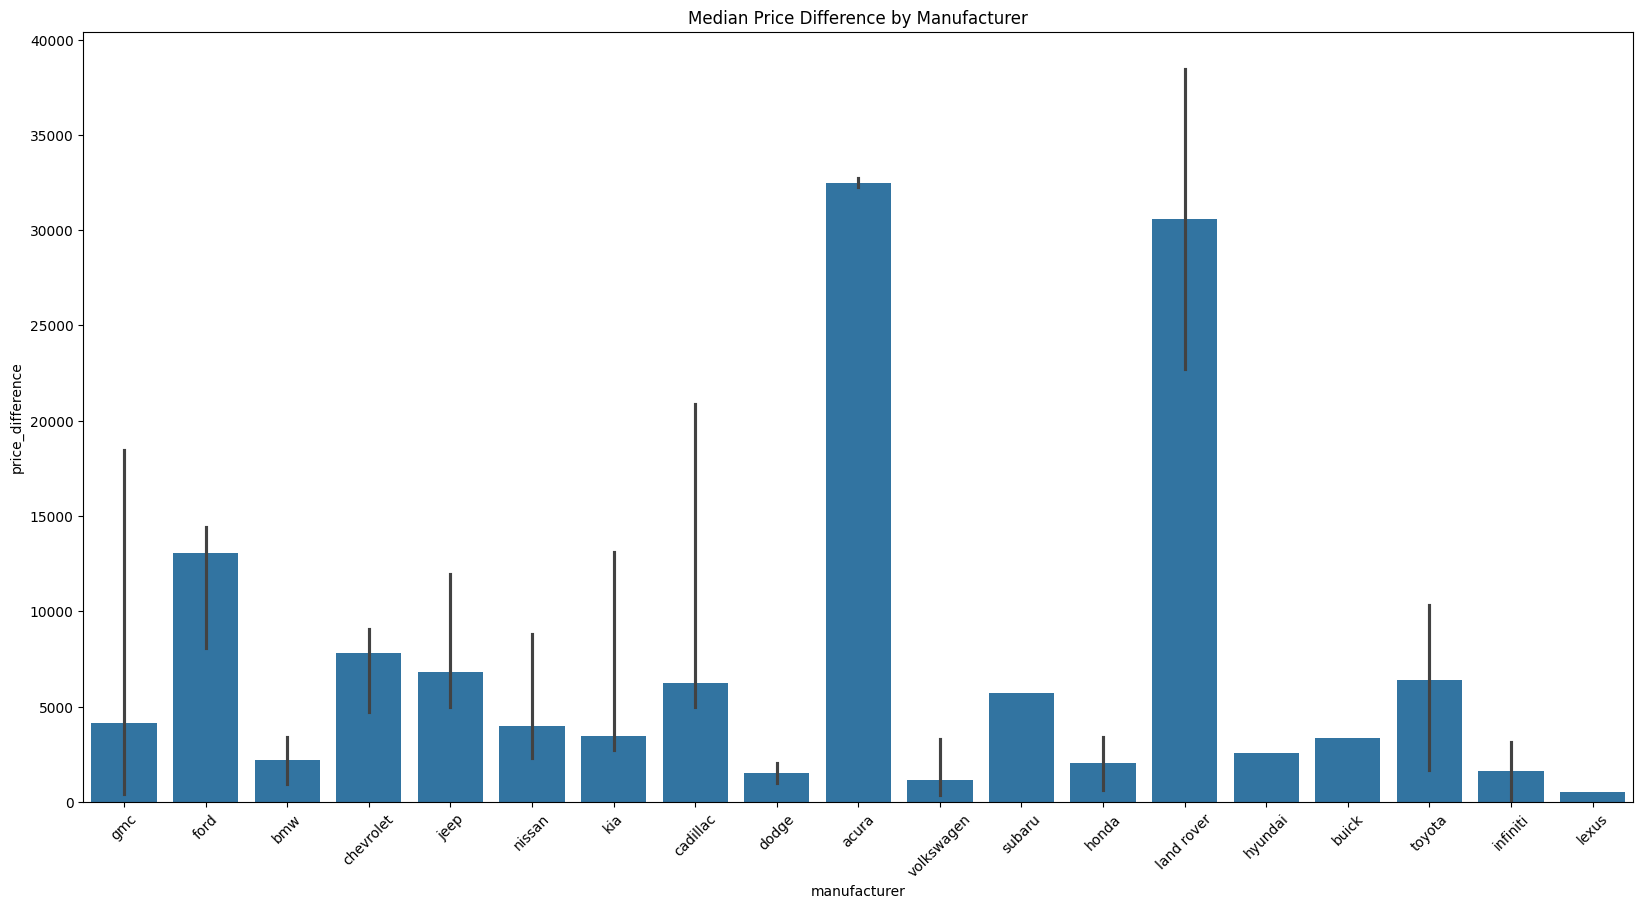

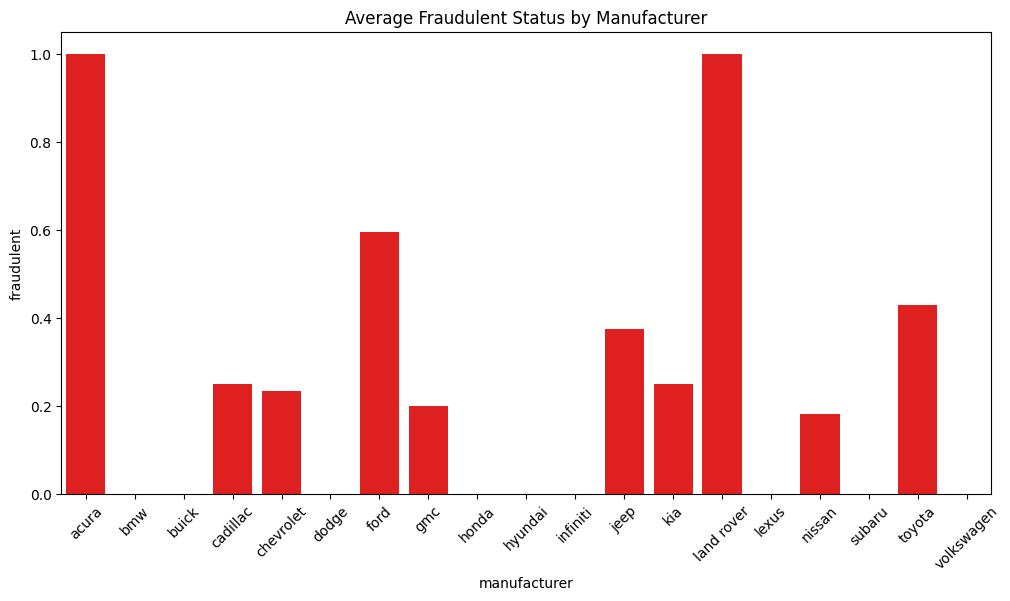

In [207]:
# Visualize the comparison
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=cars, x='manufacturer', y='price_difference', estimator=np.median, ax=ax).set(title='Median Price Difference by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Visualize the average fraudulent status on a separate plot
avg_fraudulent_status = cars.groupby('manufacturer')['fraudulent'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_fraudulent_status, x='manufacturer', y='fraudulent', color='red').set(title='Average Fraudulent Status by Manufacturer')
plt.xticks(rotation=45)
plt.show()

In [210]:
# Define risk levels based on the magnitude of price difference
def categorize_risk(price_difference):
    if price_difference < 5000:
        return 'Low Risk'
    elif price_difference < 10000 and price_difference > 5001:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Apply the categorize_risk function to create a new column 'risk_level'
cars['risk_level'] = cars['price_difference'].apply(categorize_risk)

# View the DataFrame with the new 'risk_level' column
#print(cars[['manufacturer', 'model', 'year', 'price', 'kbb_price', 'price_difference', 'risk_level']])

# Print the results
output_df = cars[['manufacturer', 'model', 'year', 'price', 'kbb_price', 'price_difference', 'risk_level']]
print(output_df)

# Save the results to a CSV file
output_csv_filename = 'price_comparison_results.csv'
output_df.to_csv(output_csv_filename, index=False)
print(f'Results have been saved to {output_csv_filename}')

    manufacturer                    model  year  price  kbb_price  \
0            gmc                  Terrain  2015   8495       8092   
1           ford                     Edge  2012   5900       7199   
2           ford                     F350  2014  29999      16934   
4           ford                     F250  2017  42897      21218   
6           ford                     F250  2014  39995      14463   
..           ...                      ...   ...    ...        ...   
170         ford                     F250  2017  38500      21218   
172       toyota                    Prius  2013  12248      10574   
173    chevrolet  Silverado 1500 Crew Cab  2019  32792      24966   
174         ford                     F350  2020  49781      45503   
175         ford                     F350  2020  49781      45503   

     price_difference     risk_level  
0               403.0       Low Risk  
1              1299.0       Low Risk  
2             13065.0      High Risk  
4             2